In [1]:
# Declaramos las librerías
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

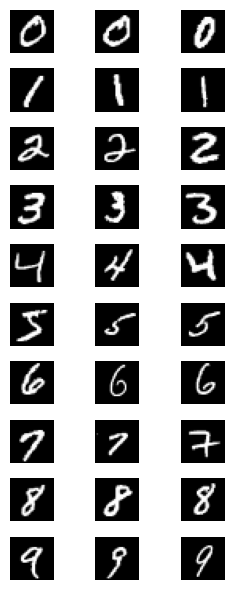

In [4]:
# Visualizar 3 imágenes de cada dígito
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(3, 6))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Crear un modelo secuencial con la API de Keras
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size = 1)

Epoch 1/5
    1/60000 [..............................] - ETA: 2:25:27 - loss: 2.6019 - accuracy: 0.0000e+00

2025-05-27 17:57:40.500711: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


60000/60000 [==============================] - 31s 506us/step - loss: 0.2624 - accuracy: 0.9226
Epoch 2/5
60000/60000 [==============================] - 31s 514us/step - loss: 0.1814 - accuracy: 0.9533
Epoch 3/5
60000/60000 [==============================] - 31s 512us/step - loss: 0.1672 - accuracy: 0.9597
Epoch 4/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.1639 - accuracy: 0.9621
Epoch 5/5
60000/60000 [==============================] - 31s 511us/step - loss: 0.1492 - accuracy: 0.9660


In [8]:
# Evaluar el modelo con el conjunto de datos de prueba
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 466us/step - loss: 0.1719 - accuracy: 0.9672


[0.17191405594348907, 0.967199981212616]

1/1 [==============================] - 0s 60ms/step


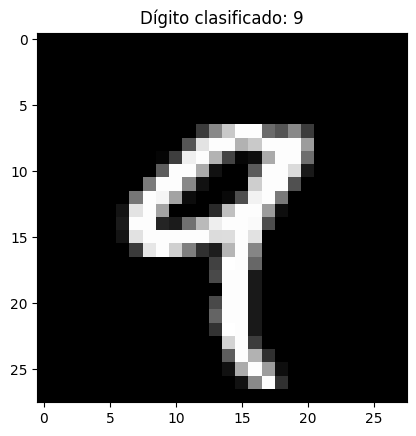

In [9]:
# Función para probar una nueva imagen
def test_new_image(img_path):
    # Cargar la imagen, convertirla al tamaño adecuado y en escala de grises
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array) if img_array.shape[-1] == 3 else img_array
    img_array = img_array / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array[:,:,0], 0)  # Asegurarse de que la imagen tiene la forma correcta (1, 28, 28)

    predictions = model.predict(img_array)
    predicted_digit = np.argmax(predictions)
    plt.imshow(img_array[0], cmap='gray')  # Mostrar la imagen adecuada
    plt.title(f'Dígito clasificado: {predicted_digit}')
    plt.show()

# Probamos nuestra imagen
test_new_image('9.png')

In [10]:
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.

    Args:
        cm: Confusion matrix as a NumPy array.
        class_names: List of class names.
        title: Title of the plot.
        cmap: Color map.
    """
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

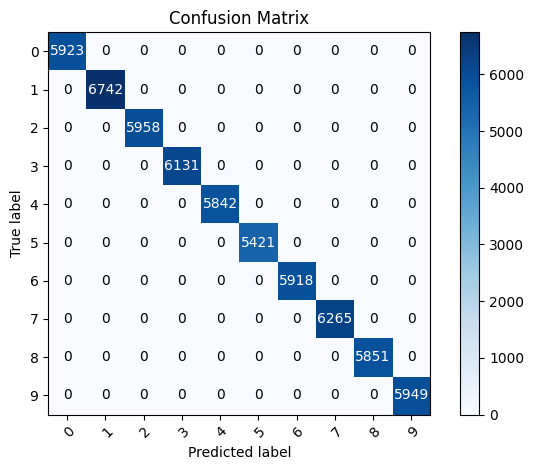

In [11]:
# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_train, y_train).numpy()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual class names

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, class_names)
plt.show()

313/313 [==============================] - 0s 457us/step


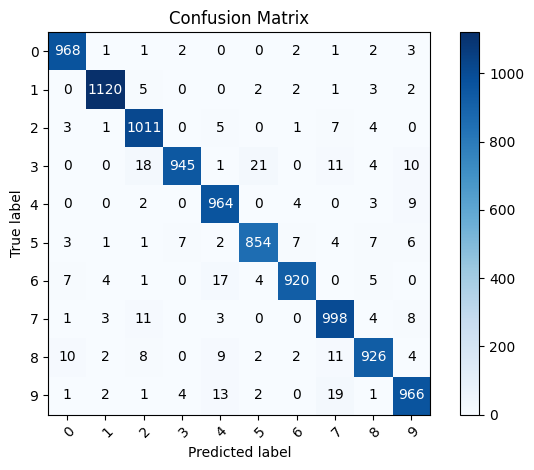

In [12]:
# predicción de la matriz de confusión real
y_comp = []

predictions = model.predict(x_test)

for p in predictions:
    predicted_digit = np.argmax(p)
    y_comp.append(predicted_digit)


# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_comp).numpy()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Replace with your actual class names

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, class_names)
plt.show()

In [13]:
# Guardar el modelo en formato H5
model.save("modelo_mnist.h5") 

1/1 [==============================] - 0s 21ms/step


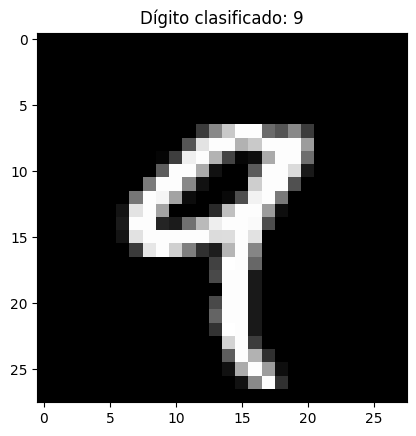

In [15]:
# Recrea exactamente el mismo modelo solo desde el archivo
stored_model = tf.keras.models.load_model('modelo_mnist.h5')

# Función para probar una nueva imagen
def test_new_image_model(img_path):
    # Cargar la imagen, convertirla al tamaño adecuado y en escala de grises
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array) if img_array.shape[-1] == 3 else img_array
    img_array = img_array / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array[:,:,0], 0)  # Asegurarse de que la imagen tiene la forma correcta (1, 28, 28)

    predictions = stored_model.predict(img_array)
    predicted_digit = np.argmax(predictions)
    plt.imshow(img_array[0], cmap='gray')  # Mostrar la imagen adecuada
    plt.title(f'Dígito clasificado: {predicted_digit}')
    plt.show()

# Probamos nuestra imagen
test_new_image_model('9.png')

## Ejercicio con Fashion M-Nist

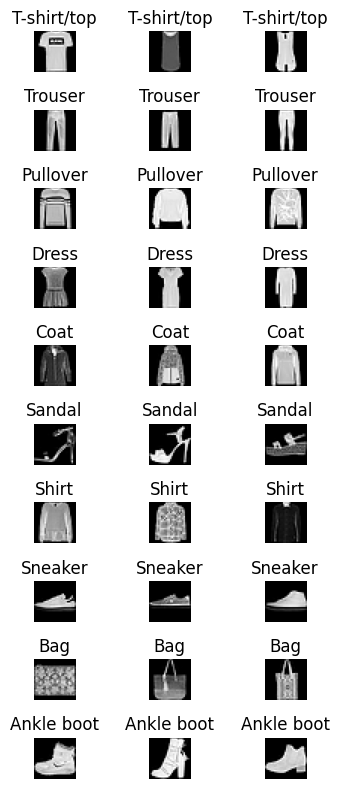

In [10]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Categorías de Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar 3 imágenes de cada categoría
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(4, 8))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
        ax.set_title(class_names[i])
plt.tight_layout()
plt.show()